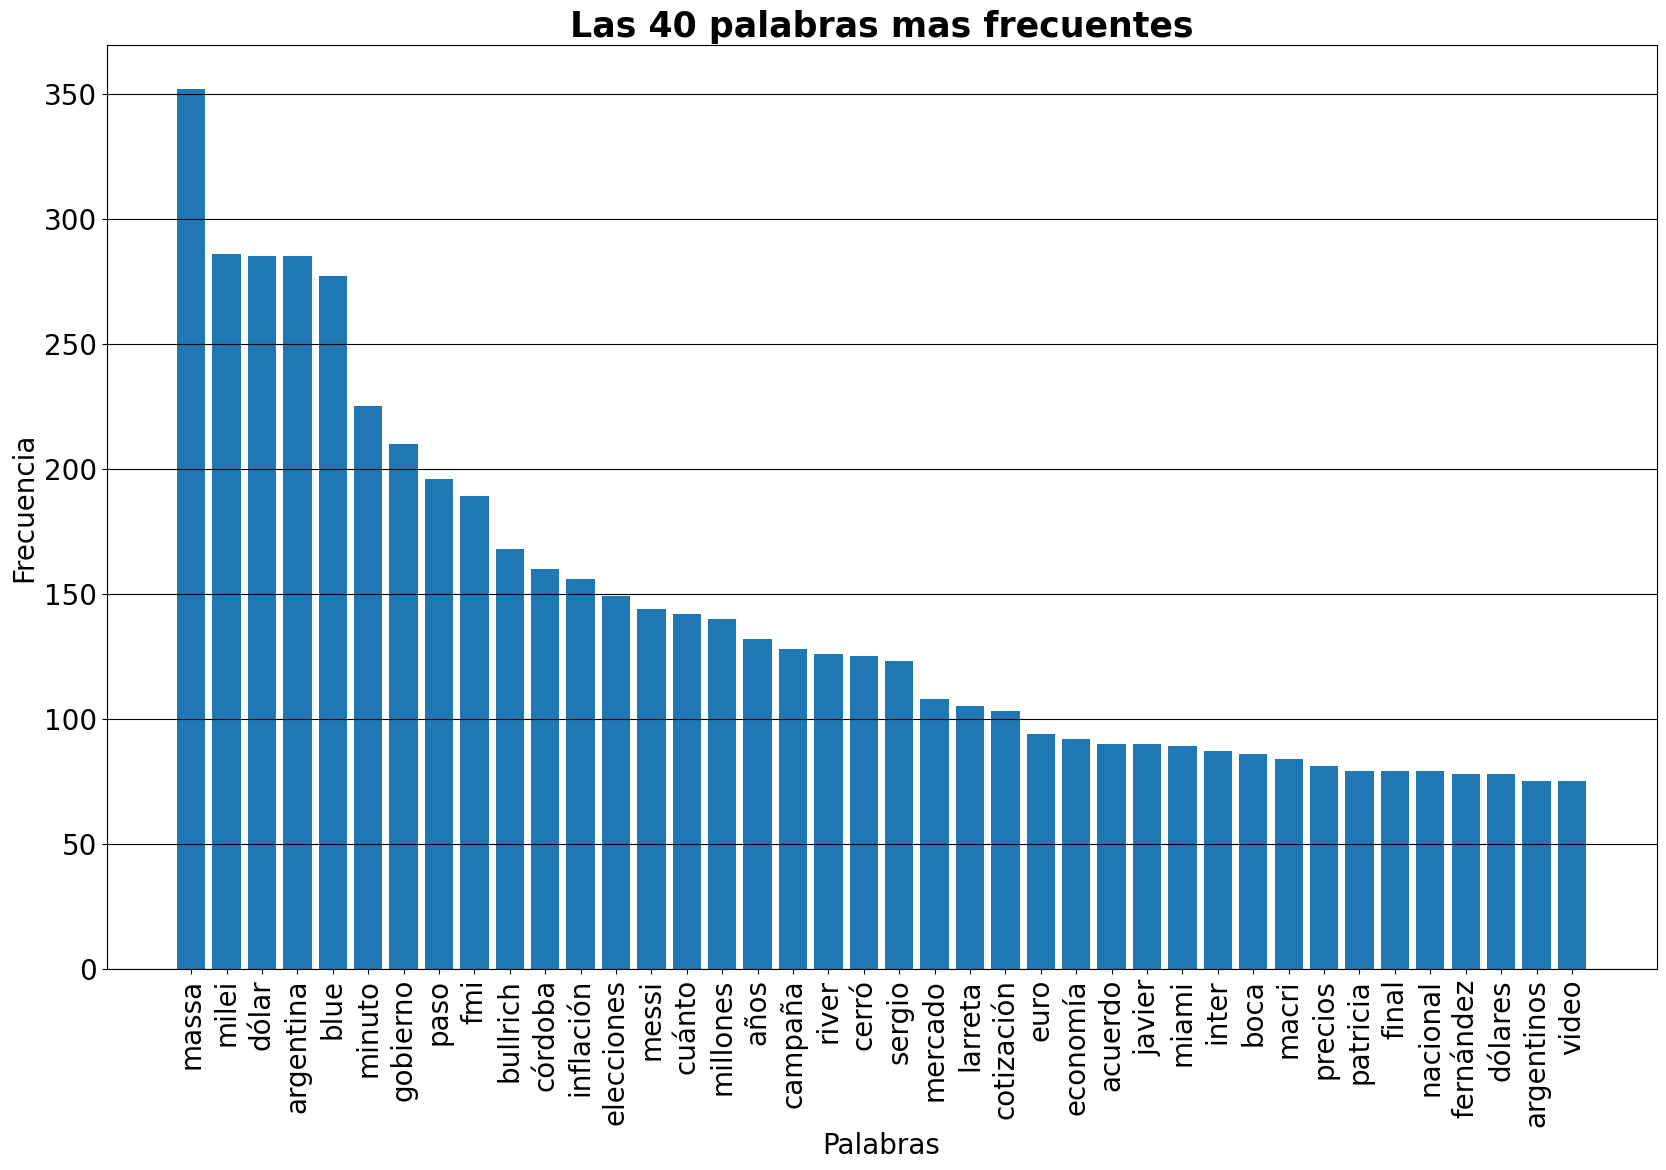

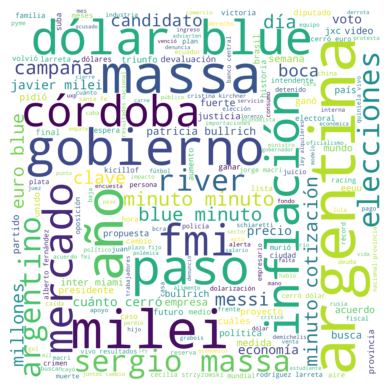

In [4]:

import sqlite3
import nltk
from matplotlib import pyplot as plt
import re
from wordcloud import WordCloud

conn = sqlite3.connect('DBTic.db')
c = conn.cursor()

tables = ["Ambito_Financiero", "Ole", "Perfil", "Telam"]
titles = []
for table in tables:
    c.execute(f"SELECT Titulo FROM {table}")
    result = c.fetchall()
    titles.extend([row[0] for row in result])

text = " ".join(titles)

stop_words = [
    "enero", "febrero", "marzo","mayo","abril","junio","julio","agosto","septiembre","octubre","noviembre","diciembre","2023", "san", "a", "actualmente", "adelante", "además", "afirmó", "agregó", "ahora", "ahí", "al", "algo", "alguna", "algunas", "alguno", "algunos", "algún",
    "alrededor", "ambos", "ampleamos", "ante", "anterior", "antes", "apenas", "aproximadamente", "aquel", "aquellas", "aquellos", "aqui", "aquí",
    "arriba", "aseguró", "así", "atras", "aunque", "ayer", "añadió", "aún", "bajo", "bastante", "bien", "buen", "buena", "buenas", "bueno", "buenos",
    "cada", "casi", "cerca", "cierta", "ciertas", "cierto", "ciertos", "cinco", "comentó", "como", "con", "conocer", "conseguimos", "conseguir",
    "considera", "consideró", "consigo", "consigue", "consiguen", "consigues", "contra", "cosas", "creo", "cual", "cuales", "cualquier", "cuando",
    "cuanto", "cuatro", "cuenta", "cómo", "da", "dado", "dan", "dar", "de", "debe", "deben", "debido", "decir", "dejó", "del", "demás", "dentro",
    "desde", "después", "dice", "dicen", "dicho", "dieron", "diferente", "diferentes", "dijeron", "dijo", "dio", "donde", "dos", "durante", "e",
    "ejemplo", "el", "ella", "ellas", "ello", "ellos", "embargo", "empleais", "emplean", "emplear", "empleas", "empleo", "en", "encima",
    "encuentra", "entonces", "entre", "era", "erais", "eramos", "eran", "eras", "eres", "es", "esa", "esas", "ese", "eso", "esos", "esta",
    "estaba", "estabais", "estaban", "estabas", "estad", "estada", "estadas", "estado", "estados", "estais", "estamos", "estan", "estando",
    "estar", "estaremos", "estará", "estarán", "estarás", "estaré", "estaréis", "estaría", "estaríais", "estaríamos", "estarían", "estarías",
    "estas", "este", "estemos", "esto", "estos", "estoy", "estuve", "estuviera", "estuvierais", "estuvieran", "estuvieras", "estuvieron",
    "estuviese", "estuvieseis", "estuviesen", "estuvieses", "estuvimos", "estuviste", "estuvisteis", "estuviéramos", "estuviésemos", "estuvo",
    "está", "estábamos", "estáis", "están", "estás", "esté", "estéis", "estén", "estés", "ex", "existe", "existen", "explicó", "expresó", "fin",
    "fue", "fuera", "fuerais", "fueran", "fueras", "fueron", "fuese", "fueseis", "fuesen", "fueses", "fui", "fuimos", "fuiste", "fuisteis",
    "fuéramos", "fuésemos", "gran", "grandes", "gueno", "ha", "haber", "habida", "habidas", "habido", "habidos", "habiendo", "habremos",
    "habrá", "habrán", "habrás", "habré", "habréis", "habría", "habríais", "habríamos", "habrían", "habrías", "habéis", "había", "habíais",
    "habíamos", "habían", "habías", "hace", "haceis", "hacemos", "hacen", "hacer", "hacerlo", "haces", "hacia", "haciendo", "hago", "han",
    "has", "hasta", "hay", "haya", "hayamos", "hayan", "hayas", "hayáis", "he", "hecho", "hemos", "hicieron", "hizo", "hoy", "hube", "hubiera",
    "hubierais", "hubieran", "hubieras", "hubieron", "hubiese", "hubieseis", "hubiesen", "hubieses", "hubimos", "hubiste", "hubisteis",
    "hubiéramos", "hubiésemos", "hubo", "igual", "incluso", "indicó", "informó", "intenta", "intentais", "intentamos", "intentan", "intentar",
    "intentas", "intento", "ir", "junto", "la", "lado", "largo", "las", "le", "les", "llegó", "lleva", "llevar", "lo", "los", "luego", "lugar",
    "manera", "manifestó", "mayor", "me", "mediante", "mejor", "mencionó", "menos", "mi", "mientras", "mio", "mis", "misma", "mismas", "mismo",
    "mismos", "modo", "momento", "mucha", "muchas", "mucho", "muchos", "muy", "más", "mí", "mía", "mías", "mío", "míos", "nada", "nadie", "ni",
    "ninguna", "ningunas", "ninguno", "ningunos", "ningún", "no", "nos", "nosotras", "nosotros", "nuestra", "nuestras", "nuestro", "nuestros",
    "nueva", "nuevas", "nuevo", "nuevos", "nunca", "o", "ocho", "os", "otra", "otras", "otro", "otros", "para", "parece", "parte", "partir",
    "pasada", "pasado", "pero", "pesar", "poca", "pocas", "poco", "pocos", "podeis", "podemos", "poder", "podria", "podriais", "podriamos",
    "podrian", "podrias", "podrá", "podrán", "podría", "podrían", "poner", "por", "por qué", "porque", "posible", "primer", "primera", "primero",
    "primeros", "principalmente", "propia", "propias", "propio", "propios", "próximo", "próximos", "pudo", "pueda", "puede", "pueden", "puedo",
    "pues", "que", "quedó", "queremos", "quien", "quienes", "quiere", "quién", "qué", "realizado", "realizar", "realizó", "respecto", "sabe",
    "sabeis", "sabemos", "saben", "saber", "sabes", "se", "sea", "seamos", "sean", "seas", "segunda", "segundo", "según", "seis", "ser",
    "seremos", "será", "serán", "serás", "seré", "seréis", "sería", "seríais", "seríamos", "serían", "serías", "seáis", "señaló", "si", "sido",
    "siempre", "siendo", "siete", "sigue", "siguiente", "sin", "sino", "sobre", "sois", "sola", "solamente", "solas", "solo", "solos", "somos",
    "son", "soy", "su", "sus", "suya", "suyas", "suyo", "suyos", "sí", "sólo", "tal", "también", "tampoco", "tan", "tanto", "te", "tendremos",
    "tendrá", "tendrán", "tendrás", "tendré", "tendréis", "tendría", "tendríais", "tendríamos", "tendrían", "tendrías", "tened", "teneis",
    "tenemos", "tener", "tenga", "tengamos", "tengan", "tengas", "tengo", "tengáis", "tenida", "tenidas", "tenido", "tenidos", "teniendo",
    "tenéis", "tenía", "teníais", "teníamos", "tenían", "tenías", "tercera", "ti", "tiempo", "tiene", "tienen", "tienes", "toda", "todas",
    "todavía", "todo", "todos", "total", "trabaja", "trabajais", "trabajamos", "trabajan", "trabajar", "trabajas", "trabajo", "tras", "trata",
    "través", "tres", "tu", "tus", "tuve", "tuviera", "tuvierais", "tuvieran", "tuvieras", "tuvieron", "tuviese", "tuvieseis", "tuviesen",
    "tuvieses", "tuvimos", "tuviste", "tuvisteis", "tuviéramos", "tuviésemos", "tuvo", "tuya", "tuyas", "tuyo", "tuyos", "tú", "ultimo", "un",
    "una", "unas", "uno", "unos", "usa", "usais", "usamos", "usan", "usar", "usas", "uso", "usted", "va", "vais", "valor", "vamos", "van",
    "varias", "varios", "vaya", "veces", "ver", "verdad", "verdadera", "verdadero", "vez", "vosotras", "vosotros", "voy", "vuestra", "vuestras",
    "vuestro", "vuestros", "y", "ya", "yo", "él", "éramos", "ésta", "éstas", "éste", "éstos", "última", "últimas", "último", "últimos"

]
symbols = [
    '¿','?','~','`','!','¡','@','#','$','%','^',
    '*','(',')','_','-','+','=','{','}','[',
    ']','\\',':',';','<','>','/', '.', ',','&','\n'
    ,'\r','\t', '|', '“', '"', '–', '”', '©', '-', '—',
    '…', ';', '‘','’'
]

def split_text(text) -> list:
    return re.findall(r'\S+', text)

def remove_stop_words_from_text(text) -> list:
    res = []
    subwords = split_text(text)
    for item in subwords:
        if not item in stop_words:
            res.append(item)
    return res

def remove_symbols (text) -> str:
    res = text
    for char in symbols:
        res = res.replace(char, '')
    return res

def clean_text (text) -> list:
    res = text.lower()
    res = remove_symbols(res)
    res = remove_stop_words_from_text(res)
    return res

text = clean_text(text)
# print(text)

name_freq = nltk.FreqDist(text)
top_names = name_freq.most_common(40)  

names, frequencies = zip(*top_names)

plt.rcParams['font.size'] = 20
plt.figure(figsize=(20, 12))
plt.bar(names, frequencies)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
ax = plt.subplot()
ax.grid(axis = 'y', color = 'black', linestyle = 'solid')
ax.set_title('Las 40 palabras mas frecuentes', loc = "center", fontdict = {'fontsize':25, 'fontweight':'bold', 'color':'black'})
plt.show()

cloud = """ """.join(text)
wc = WordCloud(width = 3000, height = 3000, background_color = "white")
wc.generate(cloud)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

conn.commit()
conn.close()

